In [2]:
%load_ext autoreload
%autoreload 2

from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = [15, 5]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Changer le chemin pointant vers le dossier dans lequel sont chargées les données

DATA_PATH = '/home/benoit/data/projet_deep_learning_cs'

In [4]:
from helpers import loadOwid


test_length = 20
load_window = (0, 410)


pop = 60.36

In [36]:
from helpers import processData, splitTrainTest

# True donnée prédite
# False donnée externe
data_description = {
    'new_deaths':True
}

d = loadOwid(DATA_PATH, "Italy", data_description, window=load_window)

d['new_deaths'] = processData(d['new_deaths'], div=pop*13, average=True)
#d['icu_patients'] = processData(d['icu_patients'], div=pop*100, offset=7)
# d['stringency_index'] = processData(d['stringency_index'], div=100, offset=7)
#d['hosp_patients'] = processData(d['hosp_patients'], div=pop*510, offset=7)

d_train, d_test = splitTrainTest(d, test_length)

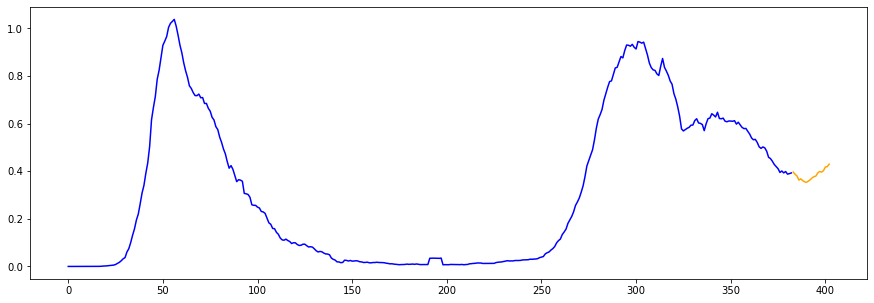

In [38]:
from matplotlib.pyplot import plot

train_length = len(d_train[list(d.keys())[0]])

train_index = [i for i in range(train_length)]
test_index = [i+train_length for i in range(test_length)]

plot(train_index, d_train['new_deaths'], color="b")
plot(test_index, d_test['new_deaths'], color ="orange")
#plot(train_index, d_train['icu_patients'], color="purple")
#plot(test_index, d_test['icu_patients'], color ="red")
# plot(d['stringency_index'], color ="green")
#plot(d['hosp_patients'], color ="pink")

In [39]:
from helpers import formatData

step = 5
# add step elements into train and test

trainX, trainY = formatData(d_train, step, data_description)
testX, testY = formatData(d_test, step, data_description)

trainX.shape

(378, 5, 1)

In [40]:
from helpers import loadModel

dim = (len(d_train.keys()), sum(list(data_description.values()))) # On calcule les dimensions d'entrée et de sortie

model = loadModel(name="simpleRNN", dim=dim, step=step, loss="mean_squared_error")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 16)                288       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
h = model.fit(trainX,trainY, epochs=1000, batch_size=16, verbose=1)

Epoch 1/1000
378/378 [==============================] - 6s 17ms/step - loss: 0.2079
Epoch 2/1000
378/378 [==============================] - 2s 5ms/step - loss: 0.2079
Epoch 3/1000
378/378 [==============================] - 1s 3ms/step - loss: 0.2079
Epoch 4/1000
378/378 [==============================] - 1s 3ms/step - loss: 0.2079
Epoch 5/1000
378/378 [==============================] - 1s 3ms/step - loss: 0.2079
Epoch 6/1000
378/378 [==============================] - 1s 2ms/step - loss: 0.2079
Epoch 7/1000
378/378 [==============================] - 1s 1ms/step - loss: 0.2079
Epoch 8/1000
378/378 [==============================] - 1s 2ms/step - loss: 0.2079
Epoch 9/1000
378/378 [==============================] - 1s 2ms/step - loss: 0.2079
Epoch 10/1000
378/378 [==============================] - 1s 2ms/step - loss: 0.2079
Epoch 11/1000
378/378 [==============================] - 1s 2ms/step - loss: 0.2079
Epoch 12/1000
378/378 [==============================] - 1s 2ms/step - loss: 0.2079


378/378 [==============================] - 0s 1ms/step - loss: 0.2079
Epoch 99/1000
378/378 [==============================] - 0s 862us/step - loss: 0.2079
Epoch 100/1000
378/378 [==============================] - 0s 965us/step - loss: 0.2079
Epoch 101/1000
378/378 [==============================] - 0s 1ms/step - loss: 0.2079
Epoch 102/1000
378/378 [==============================] - 0s 1ms/step - loss: 0.2079
Epoch 103/1000
378/378 [==============================] - 0s 1ms/step - loss: 0.2079
Epoch 104/1000
378/378 [==============================] - 0s 1ms/step - loss: 0.2079
Epoch 105/1000
378/378 [==============================] - 1s 2ms/step - loss: 0.2079
Epoch 106/1000
378/378 [==============================] - 0s 962us/step - loss: 0.2079
Epoch 107/1000
378/378 [==============================] - 0s 1ms/step - loss: 0.2079
Epoch 108/1000
378/378 [==============================] - 1s 1ms/step - loss: 0.2079
Epoch 109/1000
378/378 [==============================] - 0s 1ms/step - los

378/378 [==============================] - 0s 1ms/step - loss: 0.2079
Epoch 195/1000
378/378 [==============================] - 0s 1ms/step - loss: 0.2079
Epoch 196/1000
378/378 [==============================] - 0s 983us/step - loss: 0.2079
Epoch 197/1000
378/378 [==============================] - 0s 658us/step - loss: 0.2079
Epoch 198/1000
378/378 [==============================] - 1s 1ms/step - loss: 0.2079
Epoch 199/1000
378/378 [==============================] - 0s 1ms/step - loss: 0.2079
Epoch 200/1000
378/378 [==============================] - 0s 1ms/step - loss: 0.2079
Epoch 201/1000
378/378 [==============================] - 0s 1ms/step - loss: 0.2079
Epoch 202/1000
378/378 [==============================] - 0s 1ms/step - loss: 0.2079
Epoch 203/1000
378/378 [==============================] - 1s 2ms/step - loss: 0.2079
Epoch 204/1000
378/378 [==============================] - 1s 1ms/step - loss: 0.2079
Epoch 205/1000
378/378 [==============================] - 0s 869us/step - lo

378/378 [==============================] - 0s 1ms/step - loss: 0.2079
Epoch 291/1000
378/378 [==============================] - 0s 1ms/step - loss: 0.2079
Epoch 292/1000
378/378 [==============================] - 0s 1ms/step - loss: 0.2079
Epoch 293/1000
378/378 [==============================] - 0s 1ms/step - loss: 0.2079
Epoch 294/1000
378/378 [==============================] - 1s 2ms/step - loss: 0.2079
Epoch 295/1000
378/378 [==============================] - 0s 974us/step - loss: 0.2079
Epoch 296/1000
378/378 [==============================] - 1s 2ms/step - loss: 0.2079
Epoch 297/1000
378/378 [==============================] - 0s 987us/step - loss: 0.2079
Epoch 298/1000
378/378 [==============================] - 0s 924us/step - loss: 0.2079
Epoch 299/1000
378/378 [==============================] - 1s 1ms/step - loss: 0.2079
Epoch 300/1000
378/378 [==============================] - 0s 1ms/step - loss: 0.2079
Epoch 301/1000
378/378 [==============================] - 1s 2ms/step - lo

378/378 [==============================] - 0s 1ms/step - loss: 0.2079
Epoch 386/1000
378/378 [==============================] - 0s 864us/step - loss: 0.2079
Epoch 387/1000
378/378 [==============================] - 0s 428us/step - loss: 0.2079
Epoch 388/1000
378/378 [==============================] - 0s 595us/step - loss: 0.2079
Epoch 389/1000
378/378 [==============================] - 1s 1ms/step - loss: 0.2079
Epoch 390/1000
378/378 [==============================] - 1s 2ms/step - loss: 0.2079
Epoch 391/1000
378/378 [==============================] - 0s 1ms/step - loss: 0.2079
Epoch 392/1000
378/378 [==============================] - 1s 1ms/step - loss: 0.2079
Epoch 393/1000
378/378 [==============================] - 1s 1ms/step - loss: 0.2079
Epoch 394/1000
378/378 [==============================] - 0s 1ms/step - loss: 0.2079
Epoch 395/1000
378/378 [==============================] - 1s 1ms/step - loss: 0.2079
Epoch 396/1000
378/378 [==============================] - 0s 933us/step - 

378/378 [==============================] - 1s 1ms/step - loss: 0.2079
Epoch 482/1000
378/378 [==============================] - 0s 997us/step - loss: 0.2079
Epoch 483/1000
378/378 [==============================] - 0s 1ms/step - loss: 0.2079
Epoch 484/1000
224/378 [================>.............] - ETA: 0s - loss: 0.2230

In [ ]:
from helpers import makeForcedPredictions, makePredictions

train_predict = makeForcedPredictions(model, d_train, step, data_description)


# external_params = {"stringency_index": d["stringency_index"][-test_length:]}
external_params = {}
test_predict = makePredictions(model, trainX[-1], data_description, 200, external_params)


# freePredict = makePredictions(model, trainX[50], list(d_test.keys()), 1000)

In [ ]:
from matplotlib.pyplot import legend, axvspan
from numpy import concatenate
import matplotlib.pyplot as plt


dim = 'new_deaths'

gt = concatenate([d_train[dim], d_test[dim]], axis=0)
predicted = concatenate([train_predict[dim], test_predict[dim]], axis=0)

plot(gt, label='GT')
plot(predicted, label='Predicted')
#plot(d['stringency_index'], color="green", alpha=0.2, label='Stringency Index')
#plot(freePredict[dim], label='freePredicted')
axvspan(load_window[1]-test_length - 7, 0, facecolor='0.2', alpha=0.1)
legend()

In [ ]:
plot(h.history['loss'][:])

In [ ]:
from keras import losses

np.sqrt(losses.MSE(testPredict, cases_test).numpy())